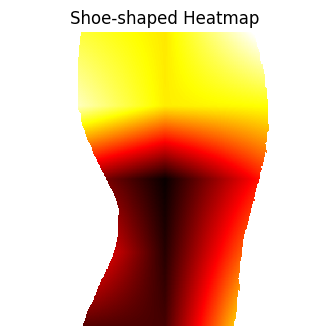

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

original = Image.open("shoe.png").convert("L")
resized = ImageOps.fit(original, (540, 512), method=Image.BILINEAR)
mask = np.array(resized) > 128

def update_plot(frame):
    if not data_queue.empty():
        new_matrix = data_queue.get()  # shape: (5, 3)

        # Interpolate sensor data to shoe size
        heat_data = zoom(new_matrix, (512/5, 540/3), order=1)

        # Apply shoe mask
        masked_heat = np.ma.masked_where(~mask, heat_data)
        heatmap.set_data(masked_heat)

        # Update cell values if needed
        for i in range(5):
            for j in range(3):
                cell_texts[i][j].set_text(f"{new_matrix[i][j]:.2f}")

    return [heatmap] + [text for row in cell_texts for text in row]


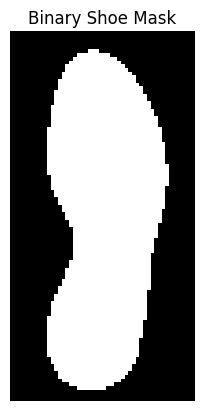

In [19]:
plt.imshow(mask, cmap="gray")
plt.title("Binary Shoe Mask")
plt.axis("off")
plt.show()
